## Inverse design

Inverse network with 20 output unit was fitted in Liu(2018). 
They used 500k training samples.

Noting that search space is large, (2^20 = 1M) 
I reduce output unit size to 6 and try to replicate the work.

* 2^4 = 16 
* 8^4 = 4k 
* 2^6 = 64 
* 8^6 = 200k 
* 2^8 = 256 
* 8^8 = 16M 

I used GeForce GTX 960 for network training

### TODO 
Check train/test loss metric (MSE) definition

In [1]:
import inverse_design
def test(inv, df,n=5):
    tests = [inv.test(df) for _ in range(n)]

    print(f"Forward network, average MSE = {sum([t['forward']['mse'] for t in tests])/n}")
    print(f"Inverse network, average MSE = {sum([t['inverse']['mse'] for t in tests])/n}")

    import numpy as np
    import matplotlib.pyplot as plt
    print()
    print("===Selected results===")
    chosen_forward = tests[np.argmin([t["forward"]["mse"] for t in tests])]['forward']
    chosen_inverse = tests[np.argmin([t["inverse"]["mse"] for t in tests])]['inverse']
    print(f"Forward network, MSE = {chosen_forward['mse']}")
    plt.plot(chosen_forward["true"][0],chosen_forward["true"][1],chosen_forward["pred"][0],chosen_forward["pred"][1])
    plt.show()
    print(f"Inverse network, MSE = {chosen_inverse['mse']}")
    plt.plot(chosen_inverse["true"][0],chosen_inverse["true"][1],chosen_inverse["pred"][0],chosen_inverse["pred"][1])
    plt.show()

## Test run

Forward training train/test loss


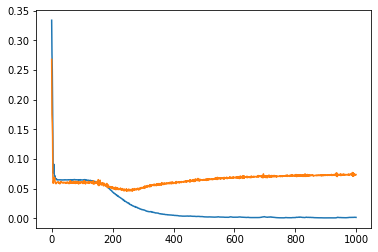

Tandem training train/test loss


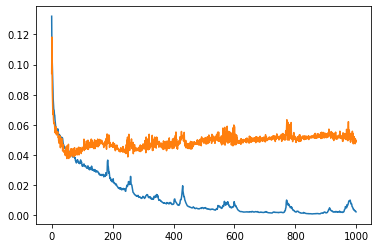

INFO:tensorflow:Assets written to: models/model_foward_b896d787bdb61e4c4ef8a7442a708a5f_test/assets
INFO:tensorflow:Assets written to: models/model_backward_b896d787bdb61e4c4ef8a7442a708a5f_test/assets
INFO:tensorflow:Assets written to: models/model_inverse_b896d787bdb61e4c4ef8a7442a708a5f_test/assets


In [2]:
config = {
    "simulation_count" : 1000,
    "layer_count" : 4,
    "spectral_range" : (0.15,0.25),
    "spectral_resolution" : 200,
    "n1":1.4,
    "n2":2.1,
    "d_min":10e-9,
    "d_max":150e-9
}
df = inverse_design.calculate_spectrum_all(config)
df = inverse_design.filter_similar_spectrum(config, df, thres_ratio = 0.1, plot=False)
inv = inverse_design.inverse_model(config)
inv.train(df, train_epochs=1000)
inv.show_history()
inv.save_model("test")
#inv.summary()

Forward network, average MSE = 0.07520309761166573
Inverse network, average MSE = 0.08893533501056776

===Selected results===
Forward network, MSE = 0.05809305980801582


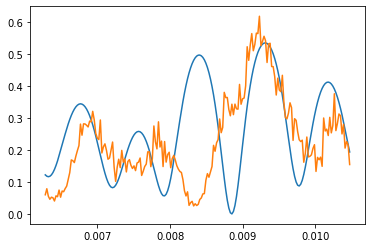

Inverse network, MSE = 0.07903662771271561


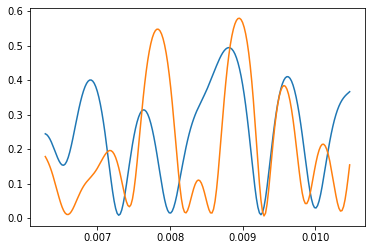

In [3]:
test(inv,df)

## Inverse design with 10k search

Forward training train/test loss


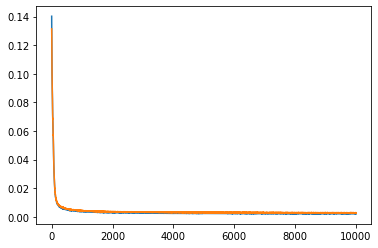

Tandem training train/test loss


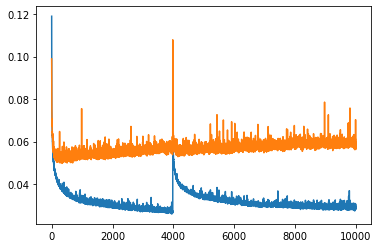

Forward network, average MSE = 0.18898678421974183
Inverse network, average MSE = 0.1351256024344542

===Selected results===
Forward network, MSE = 0.1190827488899231


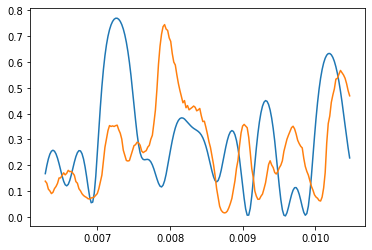

Inverse network, MSE = 0.12564872902293234


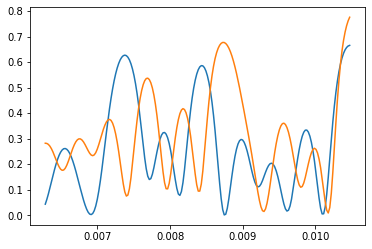

INFO:tensorflow:Assets written to: models/model_foward_774bbb7fa1457b85bb13ab8d3b560693_D0010_S0010_E0010/assets
INFO:tensorflow:Assets written to: models/model_backward_774bbb7fa1457b85bb13ab8d3b560693_D0010_S0010_E0010/assets
INFO:tensorflow:Assets written to: models/model_inverse_774bbb7fa1457b85bb13ab8d3b560693_D0010_S0010_E0010/assets


In [4]:
config = {
    "simulation_count" : 10000,
    "layer_count" : 6,
    "spectral_range" : (0.15,0.25),
    "spectral_resolution" : 200,
    "n1":1.4,
    "n2":2.1,
    "d_min":10e-9,
    "d_max":150e-9
}
df = inverse_design.calculate_spectrum_all(config)
# df = inverse_design.filter_similar_spectrum(config, df, thres_ratio = 0.1, plot=False)
inv = inverse_design.inverse_model(config)
inv.train(df, train_epochs=10000)
inv.show_history()
test(inv,df)
inv.save_model("D0010_S0010_E0010") #parameter space size, search space size, train epoch

Forward network, average MSE = 0.20808448940515517
Inverse network, average MSE = 0.12951365063977374

===Selected results===
Forward network, MSE = 0.05372574180364609


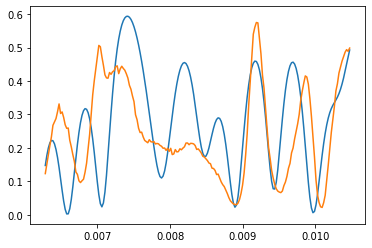

Inverse network, MSE = 0.07852391968475249


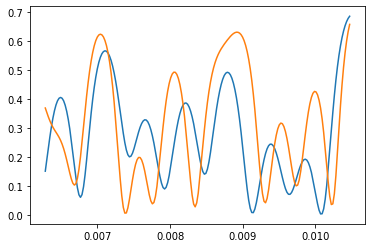

In [5]:
test(inv,df)

## Inverse design with filtered 1k search

Overfitting occurs in tandem network training.

* Inaccurate forward network may caused this problem.

* Or the model have no predictive power (loss is ruled by some extreme errors)

Forward training train/test loss


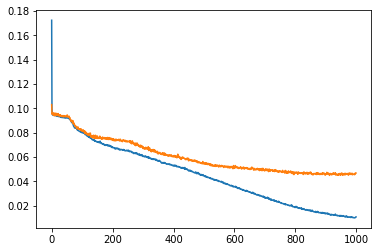

Tandem training train/test loss


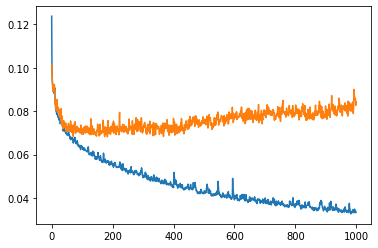

Forward network, average MSE = 0.2024277552962303
Inverse network, average MSE = 0.1488736706803223

===Selected results===
Forward network, MSE = 0.12350309640169144


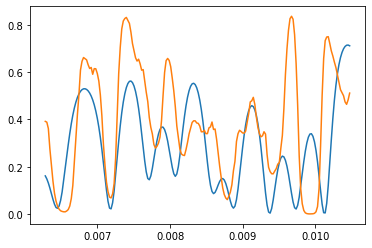

Inverse network, MSE = 0.10005105797891858


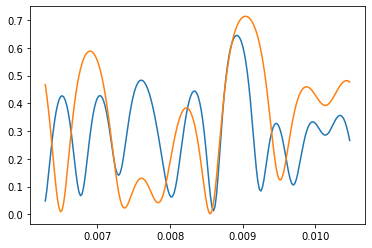

INFO:tensorflow:Assets written to: models/model_foward_774bbb7fa1457b85bb13ab8d3b560693_D0010_S0001_E0001/assets
INFO:tensorflow:Assets written to: models/model_backward_774bbb7fa1457b85bb13ab8d3b560693_D0010_S0001_E0001/assets
INFO:tensorflow:Assets written to: models/model_inverse_774bbb7fa1457b85bb13ab8d3b560693_D0010_S0001_E0001/assets


In [6]:
config = {
    "simulation_count" : 10000,
    "layer_count" : 6,
    "spectral_range" : (0.15,0.25),
    "spectral_resolution" : 200,
    "n1":1.4,
    "n2":2.1,
    "d_min":10e-9,
    "d_max":150e-9
}
df = inverse_design.calculate_spectrum_all(config)
df = inverse_design.filter_similar_spectrum(config, df, thres_ratio = 0.1, plot=False)
inv = inverse_design.inverse_model(config)
inv.train(df, train_epochs=1000)
inv.show_history()
test(inv,df)
inv.save_model("D0010_S0001_E0001") #parameter space size, search space size, train epoch

## inverse design with filtered 10k search

Model converges better than unfiltered result.

However, inverse design test result could be improved.

* mse ( = sq_sum / 200 * 4 ) < 0.008
* cost ( = sq_sum / 2 ) < 0.2

This is similar to the paper
(factor 4 is applied because spectrum is normalized to [-1,1] in this notebook)

Forward training train/test loss


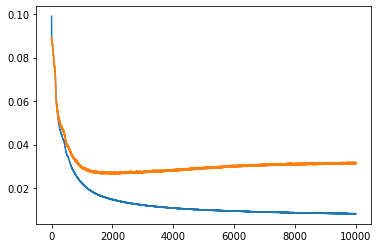

Tandem training train/test loss


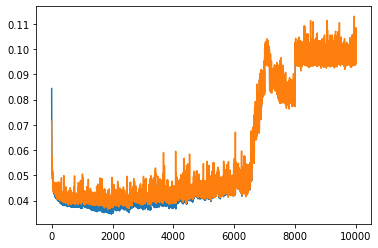

Forward network, average MSE = 0.24955731332302095
Inverse network, average MSE = 0.1233030031434704

===Selected results===
Forward network, MSE = 0.11207742989063263


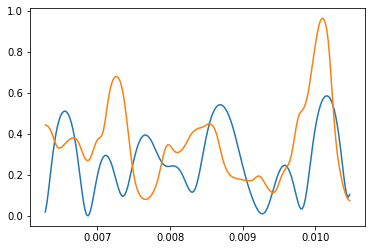

Inverse network, MSE = 0.0851674399480301


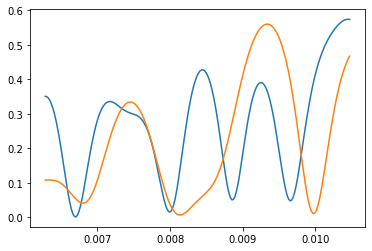

INFO:tensorflow:Assets written to: models/model_foward_fef0165152532549f696c2a76da9610c_D0100_S0010_E0010/assets
INFO:tensorflow:Assets written to: models/model_backward_fef0165152532549f696c2a76da9610c_D0100_S0010_E0010/assets
INFO:tensorflow:Assets written to: models/model_inverse_fef0165152532549f696c2a76da9610c_D0100_S0010_E0010/assets


In [7]:
config = {
    "simulation_count" : 100000,
    "layer_count" : 6,
    "spectral_range" : (0.15,0.25),
    "spectral_resolution" : 200,
    "n1":1.4,
    "n2":2.1,
    "d_min":10e-9,
    "d_max":150e-9
}
df = inverse_design.calculate_spectrum_all(config)

# split filter due to memory issue
import pandas as pd
df_1 = inverse_design.filter_similar_spectrum(config, df.iloc[     :20000,:], thres_ratio = 0.2, plot=False)
df_2 = inverse_design.filter_similar_spectrum(config, df.iloc[20000:40000,:], thres_ratio = 0.2, plot=False)
df_3 = inverse_design.filter_similar_spectrum(config, df.iloc[40000:60000,:], thres_ratio = 0.2, plot=False)
df_4 = inverse_design.filter_similar_spectrum(config, df.iloc[60000:80000,:], thres_ratio = 0.2, plot=False)
df_5 = inverse_design.filter_similar_spectrum(config, df.iloc[80000:     ,:], thres_ratio = 0.2, plot=False)
df = pd.concat([df_1,df_2,df_3,df_4,df_5], ignore_index=True)
df = inverse_design.filter_similar_spectrum(config, df, thres_ratio = 0.5, plot=False)

inv = inverse_design.inverse_model(config)
inv.train(df, train_epochs=10000)
inv.show_history()
test(inv,df)
inv.save_model("D0100_S0010_E0010") #parameter space size, search space size, train epoch

## Model accuracy impact check

To check impact of forward network accuracy,
narrow spectral range with more training epoch was applied

In [8]:
config = {
    "simulation_count" : 100000,
    "layer_count" : 6,
    "spectral_range" : (0.15,0.20),
    "spectral_resolution" : 100,
    "n1":1.4,
    "n2":2.1,
    "d_min":10e-9,
    "d_max":150e-9
}
df = inverse_design.calculate_spectrum_all(config)

# split filter due to memory issue
import pandas as pd
df_1 = inverse_design.filter_similar_spectrum(config, df.iloc[     :20000,:], thres_ratio = 0.2, plot=False)
df_2 = inverse_design.filter_similar_spectrum(config, df.iloc[20000:40000,:], thres_ratio = 0.2, plot=False)
df_3 = inverse_design.filter_similar_spectrum(config, df.iloc[40000:60000,:], thres_ratio = 0.2, plot=False)
df_4 = inverse_design.filter_similar_spectrum(config, df.iloc[60000:80000,:], thres_ratio = 0.2, plot=False)
df_5 = inverse_design.filter_similar_spectrum(config, df.iloc[80000:     ,:], thres_ratio = 0.2, plot=False)
df = pd.concat([df_1,df_2,df_3,df_4,df_5], ignore_index=True)
df = inverse_design.filter_similar_spectrum(config, df, thres_ratio = 0.5, plot=False)

inv = inverse_design.inverse_model(config)
inv.train(df, train_epochs=10000)
inv.show_history()
test(inv,df)
inv.save_model("D0100_S0010_E0010_reduced") #parameter space size, search space size, train epoch

KeyboardInterrupt: 